# Actors Age Prediction   |   Analytics Vidhya (active hackathon)  |  Current rank 75th

**Problem Statement**

Indian Movie Face database (IMFDB) is a large unconstrained face database consisting of 34512 images of 100 Indian actors collected from more than 100 videos. All the images are manually selected and cropped from the video frames resulting in a high degree of variability interms of scale, pose, expression, illumination, age, resolution, occlusion, and makeup. IMFDB is the first face database that provides a detailed annotation of every image in terms of age, pose, gender, expression and type of occlusion that may help other face related applications. For more details about the data set, read here

**Data :** 
The dataset is cleaned and formatted to give you a total of 26742 images with 19906 images in train and 6636 images in test.

The task is to predict the age of a person from his or her facial attributes. For simplicity, the problem has been converted to a multiclass problem with classes as Young, Middle and Old.



**The attributes of data are as follows:**

ID – Unique ID of image

Class – Age bin of person in image

**Complete Code and Saved model is available at this link :**

**Link to active hackathon : https://datahack.analyticsvidhya.com/contest/practice-problem-age-detection/** 

It is a difficult deep learning problem, so achieving an accuracy above 80% isn't a cup of tea.

I used pretrained FACENET model to solve this problem

In [15]:
from keras.models import load_model                     
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Convolution2D
from  tensorflow.keras.layers import MaxPooling2D
from  tensorflow.keras.layers import Flatten
from  tensorflow.keras.layers import Dense              
from  tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

**Download dataset from the given link : https://datahack.analyticsvidhya.com/contest/practice-problem-age-detection/#LeaderBoard**

Loading train.csv file which contains two attributes:
1. ID  --->   image name
2. Class  --->  Class of corresponding image

In [6]:
path = 'C:/Users/Dhiraj Jha/Downloads/Actors Age Prediction/train_DETg9GD/train.csv'
train_csv = pd.read_csv(path)
train_csv.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [ ]:
#visualization livbrary
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
# pdisplaying first training image
img_path = '/content/gdrive/My Drive/Actors Age Prediction/train_DETg9GD/Updated_train/UPDT/MIDDLE'


img = img_path + '/' + train_csv['ID'][0]
img = mpimg.imread(img)
plt.imshow(img, interpolation='nearest')
plt.axis('off')
    
plt.show()
print("Class : {}".format(train_csv['Class'][0]))

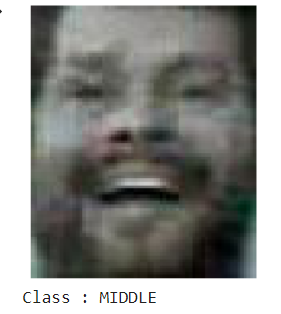

In [8]:
# image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,                        # normalizing each pixel of an image
                                   horizontal_flip=True,                  
                                   fill_mode='nearest',
                                   validation_split=0.2   # splitting training set into 80:20 ratio for train and validation set
                                  )

In [9]:
batch_size = 64

In [ ]:
# base directory containing images
base_dir = '/content/drive/My Drive/Actors Age Prediction/train_DETg9GD/Updated_train/UPDT'

training_set = train_datagen.flow_from_directory(base_dir,
                                                 target_size=(160, 160),
                                                 batch_size=batch_size,
                                                 subset = 'training',
                                                 class_mode='categorical')

valid_set = train_datagen.flow_from_directory(base_dir,
                                              
                                                 target_size=(160, 160),
                                                 batch_size=batch_size,
                                                 subset = 'validation',
                                                 class_mode='categorical')

Download  FACENET pretrained model from the above github link

In [ ]:
# loading downloaded facenet model
facenet_model = load_model('/content/drive/My Drive/facenet_keras.h5')

In [ ]:
print("Number Of Layers in the facenet  model : {}".format(len(facenet_model.layers)))

Number Of Layers in the facenet  model : 426

In [ ]:
#loading model summary
facenet_model.summary()

In [ ]:
#getting rid of the top layer
x = facenet_model.get_layer('Block8_6_ScaleSum').output

x = Flatten()(x)
x = Dense(units = 1024, activation = 'relu')(x)
x = Dense(units = 1024, activation = 'relu')(x)
x = Dense(units = 3, activation = 'softmax')(x)

In [ ]:
# creating new model by removing top layer of facenet model and adding few dense layer to it
new_model = keras.Model(inputs=facenet_model.input, outputs=x)
new_model.summary()

In [ ]:
# Compiling the Model
from tensorflow.keras import optimizers
new_model.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training model
history = new_model.fit_generator(training_set,
                                  shuffle=True,
                                  steps_per_epoch = training_set.samples // batch_size,
                                  validation_data = valid_set, 
                                  validation_steps = valid_set.samples // batch_size,
                                  epochs=50
                                  )

In [ ]:
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

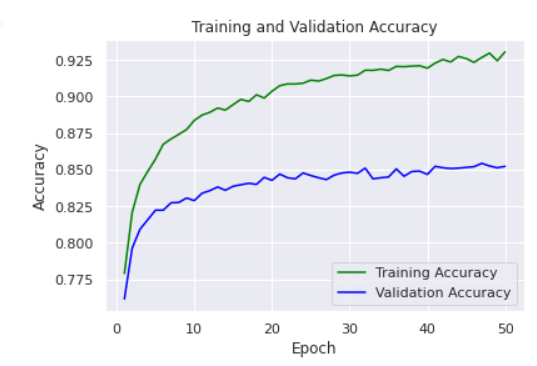

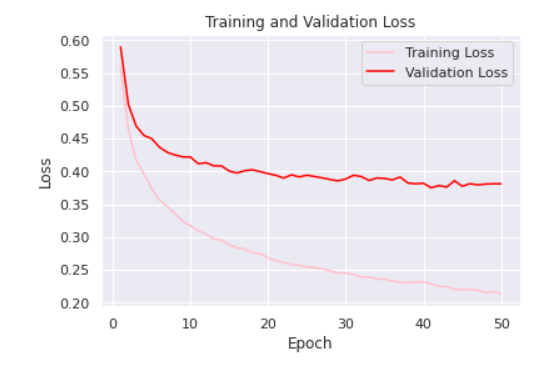

**Achieved an accuracy of 85.35% on the test set**